<a href="https://colab.research.google.com/github/paTRA9090/Flood-Prediction/blob/main/Flood_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import models and metrics from Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix

# Load the dataset
# (Make sure you have uploaded 'flood_dataset_classification.csv' to Colab)
try:
    df = pd.read_csv('flood_dataset_classification.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'flood_dataset_classification.csv' not found.")
    print("Please upload the file to your Colab environment.")

# Display the first few rows
print(df.head())

Dataset loaded successfully!
   Disaster Type  Latitude  Longitude  Total Deaths  Total Affected  duration  \
0              0   52.6717    -0.2995         300.0          3000.0       0.0   
1              0   35.6897   139.6920        1379.0         13790.0       0.0   
2              0   39.9050   116.3910      100000.0       1000000.0       0.0   
3              0   23.1288   113.2590           0.0       3000000.0       0.0   
4              0   39.1467   117.2060           0.0        635000.0       0.0   

   time     Rainfall  Elevation      Slope  distance  occured  
0  1900  1383.125626       11.0   1.788207       0.0        1  
1  1909  1383.125626       49.0  24.356508       0.0        1  
2  1909   580.345856       55.0   8.374380       0.0        1  
3  1912  2993.401777        7.0  12.917221       0.0        1  
4  1913  1383.125626        3.0   1.513093       0.0        1  



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Disaster Type   6237 non-null   int64  
 1   Latitude        6237 non-null   float64
 2   Longitude       6237 non-null   float64
 3   Total Deaths    6237 non-null   float64
 4   Total Affected  6237 non-null   float64
 5   duration        6237 non-null   float64
 6   time            6237 non-null   int64  
 7   Rainfall        6237 non-null   float64
 8   Elevation       6237 non-null   float64
 9   Slope           6237 non-null   float64
 10  distance        6237 non-null   float64
 11  occured         6237 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 584.8 KB

--- Missing Values ---
Disaster Type     0
Latitude          0
Longitude         0
Total Deaths      0
Total Affected    0
duration          0
time              0
Rainfall          0
Elevatio

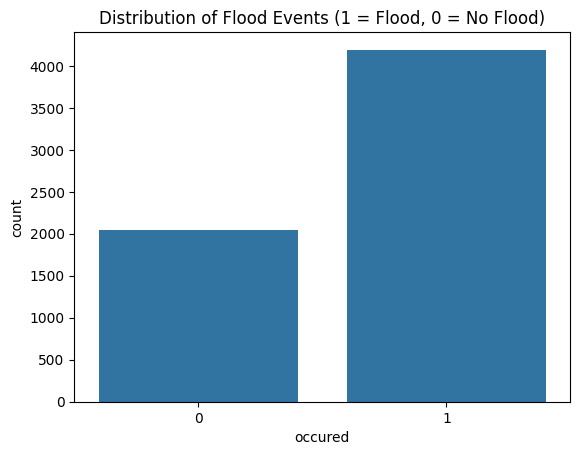

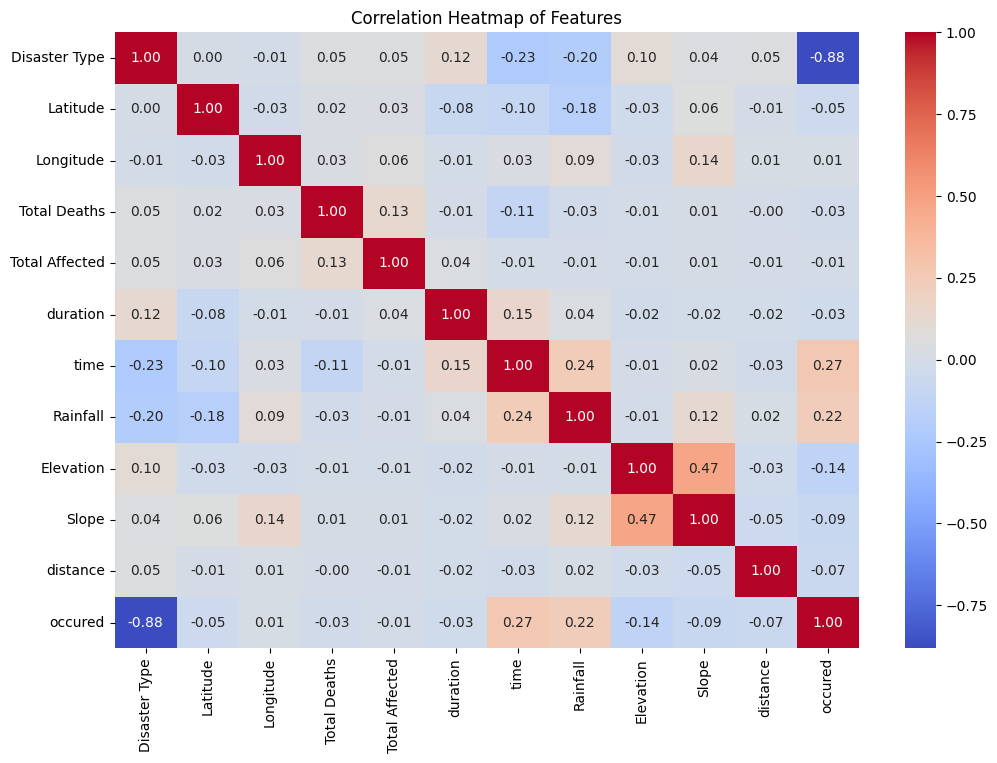

In [ ]:
# Get a quick overview of the data
print("\n--- Data Info ---")
df.info()

# Check for any missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# --- Exploratory Data Analysis (EDA) ---

# See the distribution of the target variable ('occured')
# **FIXED: Changed 'occurred' to 'occured'**
print("\n--- Target Variable Distribution ---")
print(df['occured'].value_counts())

# **FIXED: Changed 'occurred' to 'occured'**
sns.countplot(x='occured', data=df)
plt.title('Distribution of Flood Events (1 = Flood, 0 = No Flood)')
plt.show()

# Plot a correlation heatmap to see how features relate
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


In [ ]:
# Define our features (X) and target (y)
# We'll drop 'Disaster Type' as it's not a weather metric
# **FIXED: Changed 'occurred' to 'occured'**
X = df.drop(['Disaster Type', 'occured'], axis=1)
y = df['occured'] # <-- **FIXED HERE AS WELL**

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling ---
# We scale the data *after* splitting to prevent data leakage
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (4989, 10)
Testing data shape: (1248, 10)


In [ ]:
# Initialize and train the Logistic Regression model
print("\n--- Training Logistic Regression ---")
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("\n--- Logistic Regression Results ---")
print(classification_report(y_test, y_pred_lr))
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")


--- Training Logistic Regression ---

--- Logistic Regression Results ---
              precision    recall  f1-score   support

           0       0.71      0.35      0.47       383
           1       0.77      0.94      0.84       865

    accuracy                           0.76      1248
   macro avg       0.74      0.65      0.66      1248
weighted avg       0.75      0.76      0.73      1248

F1-Score: 0.8430


In [ ]:
# Initialize and train the Random Forest model
print("\n--- Training Random Forest ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("\n--- Random Forest Results ---")
print(classification_report(y_test, y_pred_rf))
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")


--- Training Random Forest ---

--- Random Forest Results ---
              precision    recall  f1-score   support

           0       0.82      0.64      0.72       383
           1       0.86      0.94      0.90       865

    accuracy                           0.85      1248
   macro avg       0.84      0.79      0.81      1248
weighted avg       0.85      0.85      0.84      1248

F1-Score: 0.8951


In [ ]:
# Compare F1-Scores
lr_f1 = f1_score(y_test, y_pred_lr)
rf_f1 = f1_score(y_test, y_pred_rf)

print("\n--- Model Comparison ---")
print(f"Logistic Regression F1-Score: {lr_f1:.4f}")
print(f"Random Forest F1-Score:       {rf_f1:.4f}")

if rf_f1 > lr_f1:
    print("\nRandom Forest performed better.")
else:
    print("\nLogistic Regression performed better.")


--- Model Comparison ---
Logistic Regression F1-Score: 0.8430
Random Forest F1-Score:       0.8951

Random Forest performed better.
